# T-SNE and UMAP - Effect of initialization on the dimensionality reduction

- toc: true
- badges: true
- comments: true
- author: Pushkar G. Ghanekar
- categories: [python, data-visualization]

Recreating the dataset explored in the recent publication: 
[Initialization is critical for preserving global data structure in both t-SNE and UMAP](https://www.nature.com/articles/s41587-020-00809-z)

* For TSNE: [Link](https://opentsne.readthedocs.io/en/latest/)
* For UMAP: [Link](https://umap-learn.readthedocs.io/en/latest/)


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

import openTSNE, umap
print('openTSNE', openTSNE.__version__)
print('umap', umap.__version__)

openTSNE 0.6.0
umap 0.5.1


In [2]:
from openTSNE import TSNE
from umap import UMAP

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
X = digits.data
Y = digits.target

In [6]:
%%time

# BH is faster for this sample size
Z1 = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(X)
Z2 = TSNE(n_jobs=-1, negative_gradient_method='bh').fit(X)

CPU times: user 15 s, sys: 301 ms, total: 15.3 s
Wall time: 13.4 s


In [7]:
%%time

Z3 = UMAP(init='random', random_state=42).fit_transform(X)
Z4 = UMAP().fit_transform(X)

CPU times: user 18.6 s, sys: 356 ms, total: 19 s
Wall time: 13.4 s


In [8]:
%%time
from sklearn import decomposition
pca_2D = decomposition.PCA(n_components=2)
pca_2D.fit(X)
Z5 = pca_2D.transform(X)

CPU times: user 19.4 ms, sys: 20.6 ms, total: 40 ms
Wall time: 8.46 ms


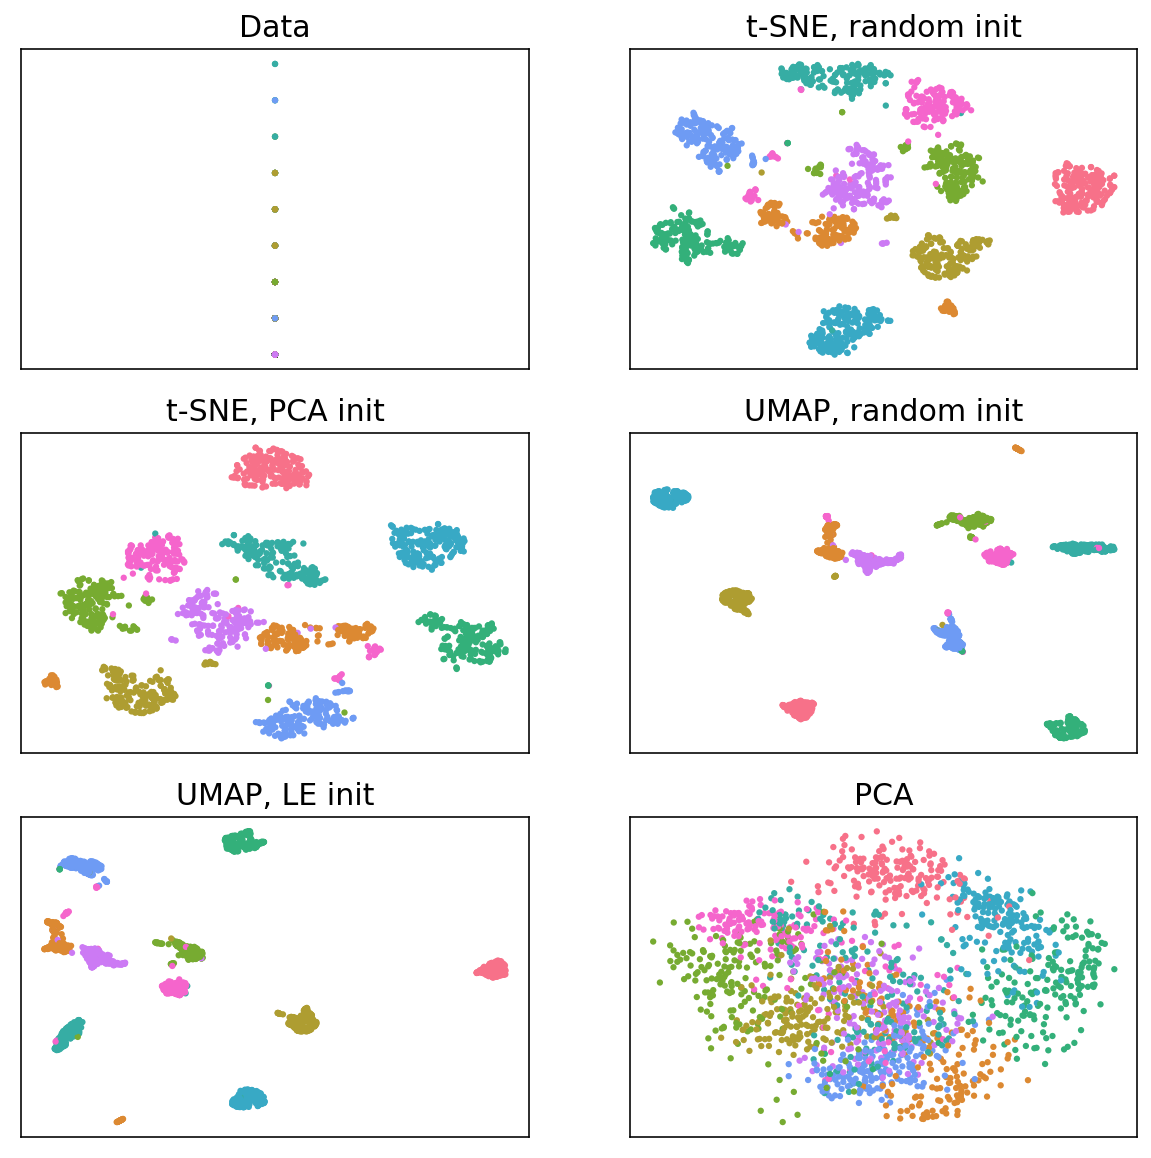

In [9]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(len(np.unique(Y))))

titles = ['Data', 't-SNE, random init', 't-SNE, PCA init', 
          'UMAP, random init', 'UMAP, LE init', 'PCA']

fig, ax = plt.subplots(3,2, figsize=(10,10))
ax = ax.flatten()

for i,Z in enumerate([X,Z1,Z2,Z3,Z4,Z5]):
    ax[i].scatter(Z[:,0], Z[:,1], s=10, c=Y, cmap=cmap, edgecolor='none', label=Y)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(titles[i], fontsize=15)
    
#sns.despine(left=True, bottom=True)